# SQL Query


```
SELECT limit_balance,
       cast(sex AS INT) gender,
       cast(education_level AS INT) AS education_level,
       cast(marital_status AS INT) AS marital_status,
       age, pay_0 AS pay_1, pay_2, pay_3, pay_4,
       cast(pay_5 AS DECIMAL) AS pay_5,
       cast(pay_6 AS DECIMAL)AS pay_6,
       bill_amt_1, bill_amt_2, bill_amt_3,
       bill_amt_4, bill_amt_5, bill_amt_6,
       pay_amt_1, pay_amt_2, pay_amt_3,
       pay_amt_4, pay_amt_5, pay_amt_6,
       cast(default_payment_next_month AS INT) AS def_payment
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 33932
```

# Introduction

Name        : Muhamad Arif Rachman Hatab

Batch       : FTDS-017-RMT

Dataset     : Bigquery-public-data.ml_datasets.credit_card_default

Objective   : **Predict credit card default payment for next month from clients personal information and credit card usage behaviors with tuned supervised learning model.**

# Working Area

## 1 - Import Libraries

In [1]:
# For Dataframe Preparation
import pandas as pd
import numpy as np

# Train & Test Split
from sklearn.model_selection import train_test_split

# For Scalling and Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# For Feature Importance
import phik

# Model Used
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Model Improvement
from sklearn.model_selection import RandomizedSearchCV

# Model Inferencing
import pickle
import json

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## 2 - Data Loading

In [2]:
# Load Data
data_origin = pd.read_csv('h8dsft_P1M1_Muhamad_ArifRH.csv')

# Backup Origin Dataframe
df = data_origin.copy()

# Show head
pd.set_option('display.max_columns', None)
df.head()

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [3]:
# Show tail
df.tail()

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1,-2,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1,-2,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2,-2,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,-2,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2,-2,430.0,35993.0,2772.0,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


In [4]:
# Show shape
df.shape

(2965, 24)

In [5]:
# Split Data for Inferencing
data_inference = df.sample(n=5, random_state=1211)
df = df.drop(data_inference.index)
df.shape

(2960, 24)

## 3 - EDA

In [6]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2960 non-null   float64
 1   gender           2960 non-null   int64  
 2   education_level  2960 non-null   int64  
 3   marital_status   2960 non-null   int64  
 4   age              2960 non-null   float64
 5   pay_1            2960 non-null   float64
 6   pay_2            2960 non-null   float64
 7   pay_3            2960 non-null   float64
 8   pay_4            2960 non-null   float64
 9   pay_5            2960 non-null   int64  
 10  pay_6            2960 non-null   int64  
 11  bill_amt_1       2960 non-null   float64
 12  bill_amt_2       2960 non-null   float64
 13  bill_amt_3       2960 non-null   float64
 14  bill_amt_4       2960 non-null   float64
 15  bill_amt_5       2960 non-null   float64
 16  bill_amt_6       2960 non-null   float64
 17  pay_amt_1     

Text(0.5, 1.0, 'Graphic 1. Percentage of Default Payment')

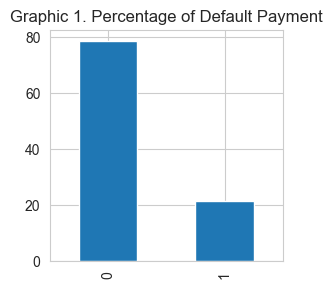

In [7]:
# Set Visualize Preference
sns.set_style(style='whitegrid') # Style

# Check Clients Percentage with Default Paymeny Next Month
def_pay_count = df['def_payment'].value_counts(normalize=True)*100
def_pay_count.plot.bar(figsize=(3,3))
plt.title('Graphic 1. Percentage of Default Payment')

Above shows that around 22% of clients are expected to default the payment while the rest 78% are not.

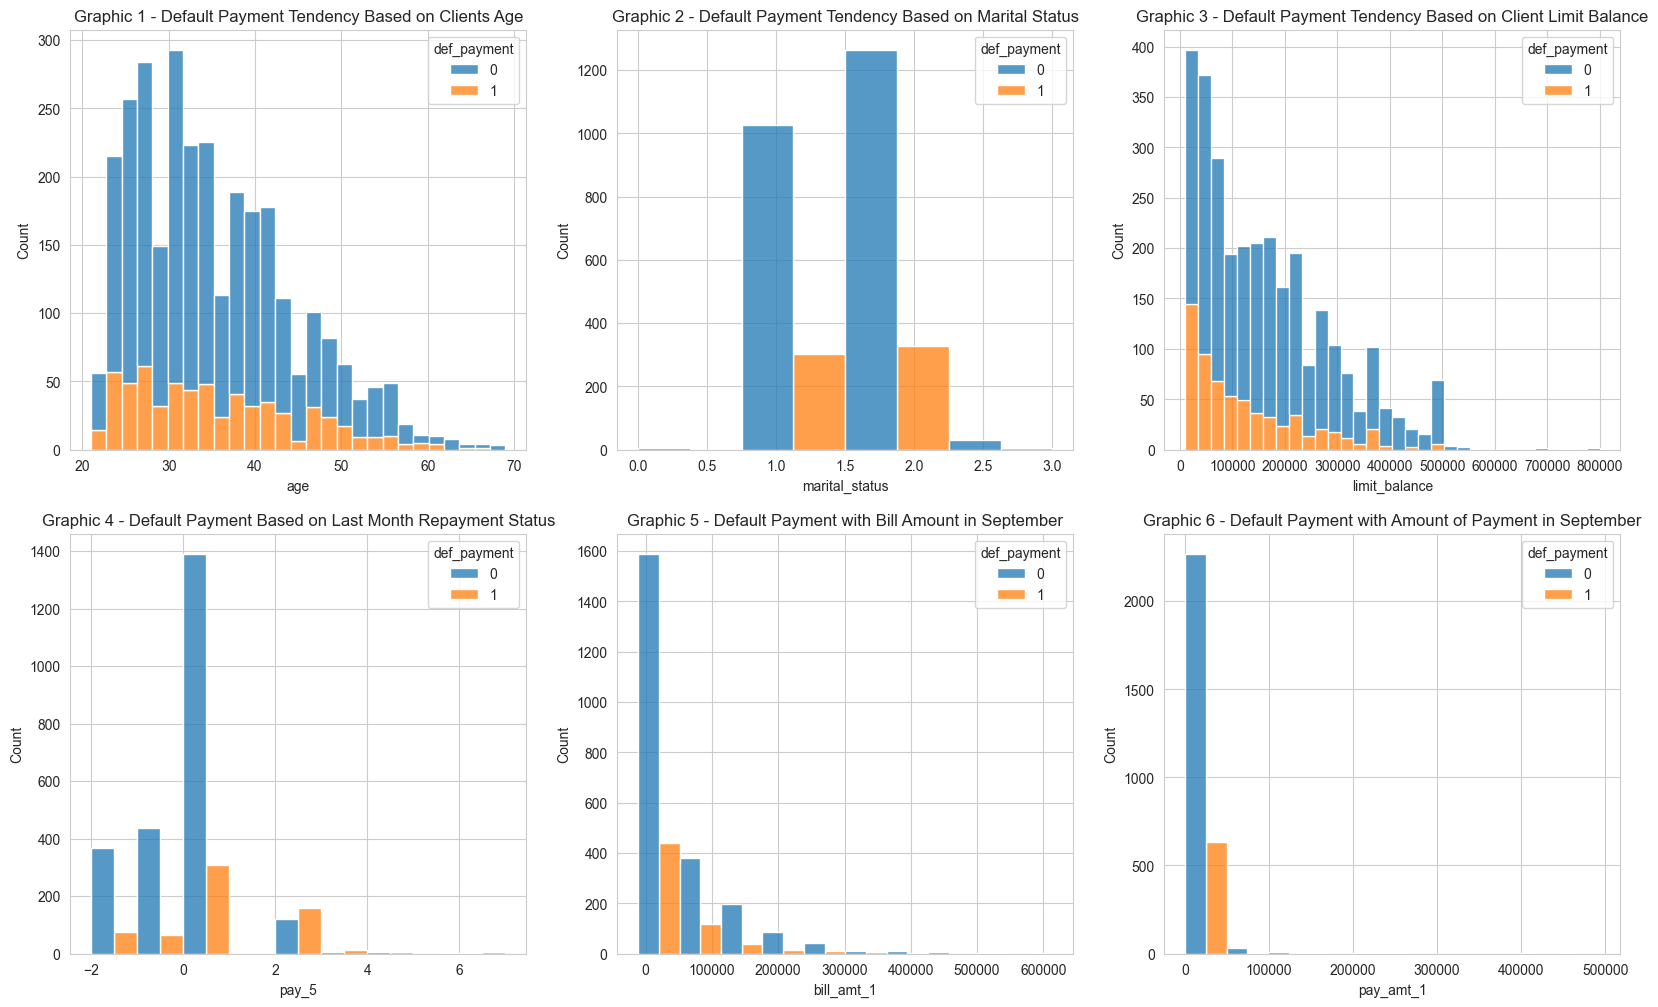

In [8]:
# Set Size
plt.figure(figsize=(20,12))

# Visualize Clients Default Payment Based on Age
plt.subplot(231)
sns.histplot(data=df, x='age', hue='def_payment', multiple='stack')
plt.title('Graphic 1 - Default Payment Tendency Based on Clients Age')

# Visualize Clients Default Payment Based on Marital Status
plt.subplot(232)
sns.histplot(data=df, x='marital_status', hue='def_payment', multiple='dodge', bins=4)
plt.title('Graphic 2 - Default Payment Tendency Based on Marital Status')

# Visualize Relation of Clients Limit Balance with Default Payment
plt.subplot(233)
sns.histplot(data=df, x='limit_balance', hue='def_payment', multiple='stack')
plt.title('Graphic 3 - Default Payment Tendency Based on Client Limit Balance')

# Visualize Default Payment Based on Last Month Repayment Status
plt.subplot(234)
bins = len(df['pay_5'].unique()) # Set Bins Based on pay_5 Unique Values
sns.histplot(data=df, x='pay_5', hue='def_payment', multiple='dodge', bins=bins)
plt.title('Graphic 4 - Default Payment Based on Last Month Repayment Status')

# Visualize Default Payment and September Bill Amount
plt.subplot(235)
bill_group = df[['bill_amt_1', 'def_payment']]
sns.histplot(data=df, x='bill_amt_1', hue='def_payment', bins=10, multiple='dodge')
plt.title('Graphic 5 - Default Payment with Bill Amount in September')

# Visualize Default Payment and September Payment Amount
plt.subplot(236)
amt_group = df[['pay_amt_1', 'def_payment']]
sns.histplot(data=df, x='pay_amt_1', hue='def_payment', bins=10, multiple='dodge')
plt.title('Graphic 6 - Default Payment with Amount of Payment in September')
plt.show()

Graphic 1 shows the amount of clients with defaulting payment (label 1) and not defaulting payment (label 0) based on clients age. It indicates that clients with age between 22 - 30 tend to have defaulting payment.

Grapich 2 shows the amount of clients with defaulting payment or not that are grouped with thier marital status. Label 1, 2 and 3 indicates clients marital status, where 1, 2, 4 is relating wether clients are married, single or other, respectively. This visulization shows that for client with default payment, theres a slight difference between clients that are married and single.

Graphic 3 indicates that clients with higher limit balance has less probability to have default payment

Graphic 4 pay_5 label consist of -2, -1, 0, 1, 2, 3, 4, 5, 6, whereas it tells wether clients have due payment or not. Negative values represent clients that pay their bill duly, positive values is the amount of month for payment delay. It seems that amount of payment delay does not have much influence towards clients tendency to have their next payment default.

Graphic 5 and 6 visualize that default payment has somewhat linear correlation with clients bill and payment amount, clients tend to have their payment default with lesser last bill/payment amount.

Overall our EDA shows that clients with **lower limit balance** tends to **delay their payment and are higher in probability to have their payment defaults**.

## 4 - Data Preprocessing

### 4.1 - Split Train & Test Set

In [9]:
# Split Target & Features
y = df['def_payment']
x = df.drop(['def_payment'], axis=1)

# Split Train & Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69, stratify=y)
print('Train-set size : ', x_train.shape)
print('Test-set size : ', x_test.shape)

Train-set size :  (2368, 23)
Test-set size :  (592, 23)


In [10]:
# Check Missing Values in Features
x_train.isnull().sum()

limit_balance      0
gender             0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [11]:
x_test.isnull().sum()

limit_balance      0
gender             0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Since there are no missing values in both x_train and x_test, we will handle outliers in x_train before we continue to check for missing values in target set.

### 4.2 - Handling Outliers

#### Diagnose Outliers

Diagnose variable limit_balance


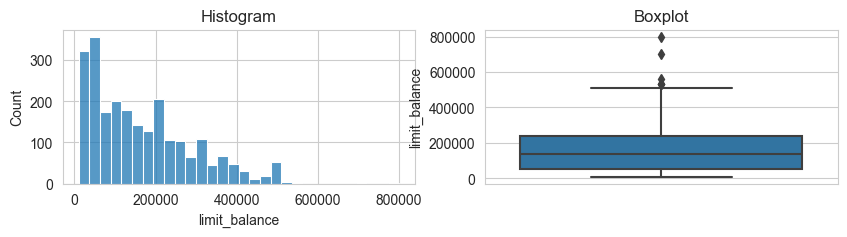

Skewness Value :  0.9320635504739802


Diagnose variable gender


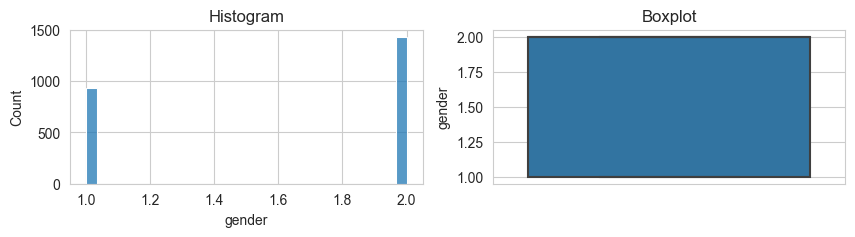

Skewness Value :  -0.4268866509301601


Diagnose variable education_level


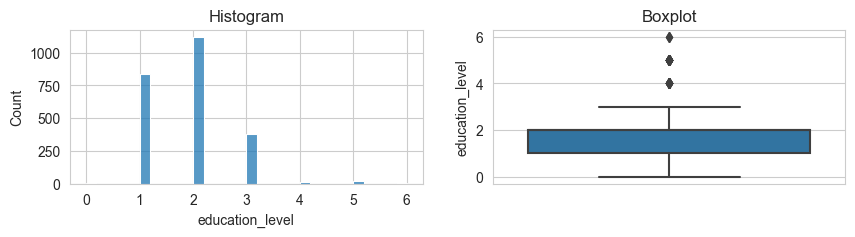

Skewness Value :  0.8914555922613845


Diagnose variable marital_status


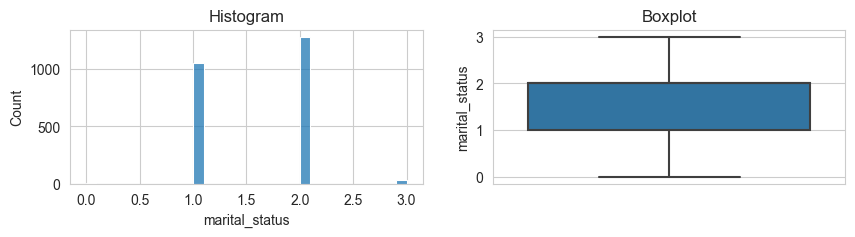

Skewness Value :  -0.02523133808090384


Diagnose variable age


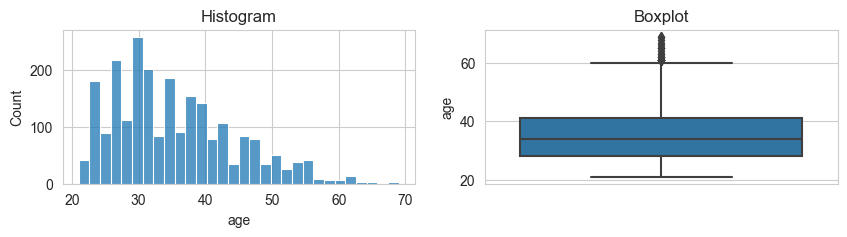

Skewness Value :  0.7812507843000872


Diagnose variable pay_1


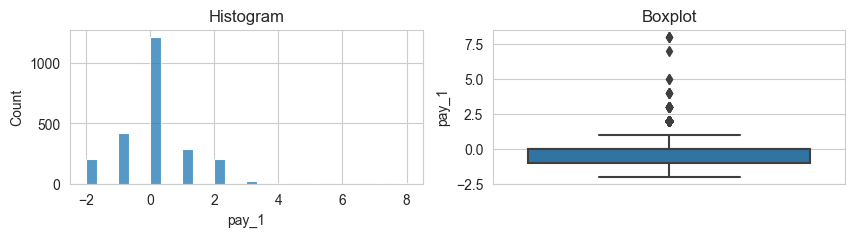

Skewness Value :  0.9036781767691653


Diagnose variable pay_2


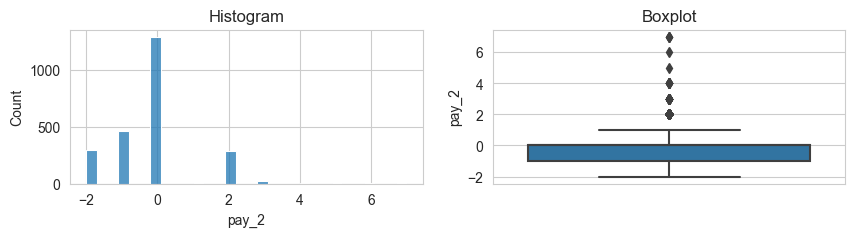

Skewness Value :  0.8833263254278474


Diagnose variable pay_3


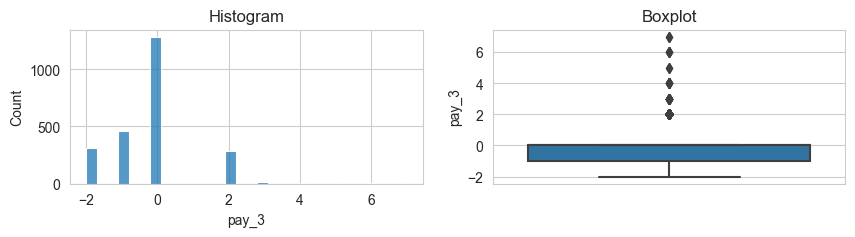

Skewness Value :  0.93004685137145


Diagnose variable pay_4


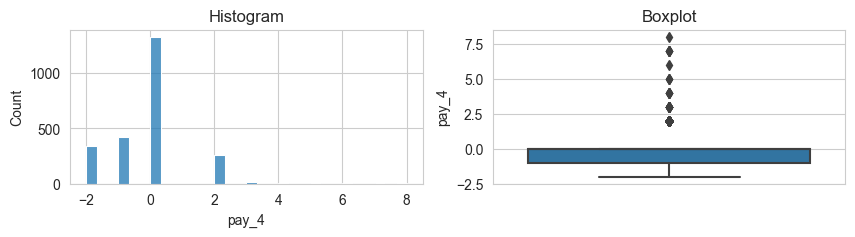

Skewness Value :  1.1098063615255207


Diagnose variable pay_5


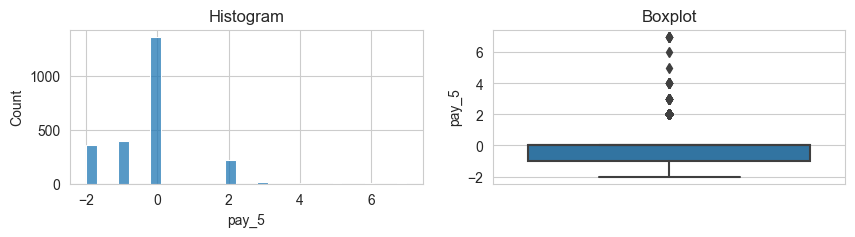

Skewness Value :  1.0912224956035323


Diagnose variable pay_6


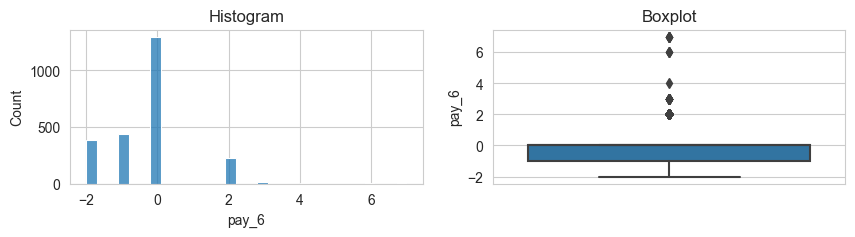

Skewness Value :  1.0344877162713386


Diagnose variable bill_amt_1


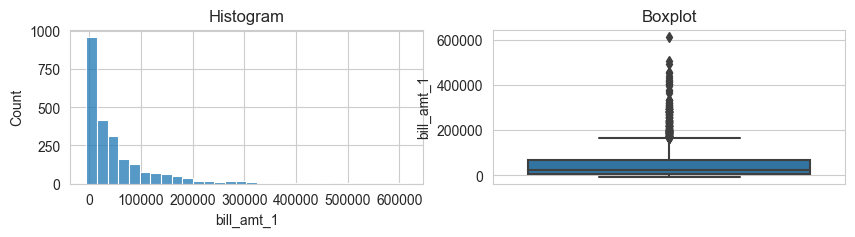

Skewness Value :  2.478255927594998


Diagnose variable bill_amt_2


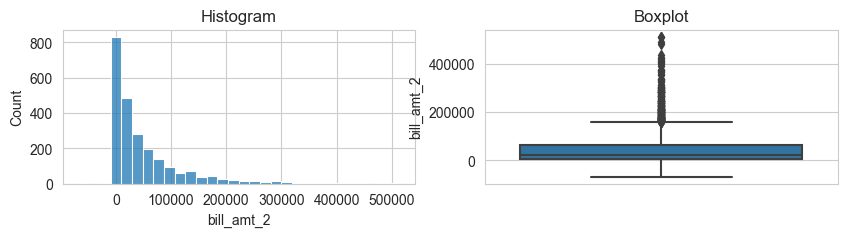

Skewness Value :  2.4623890145463947


Diagnose variable bill_amt_3


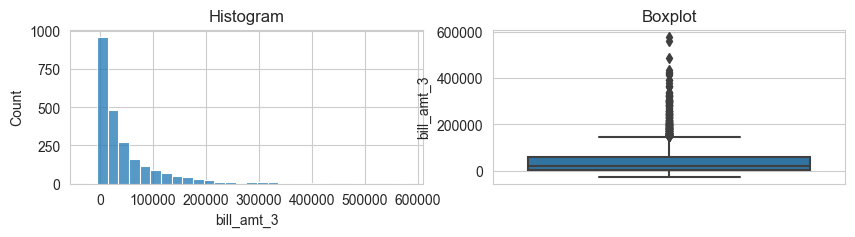

Skewness Value :  2.6173348380852945


Diagnose variable bill_amt_4


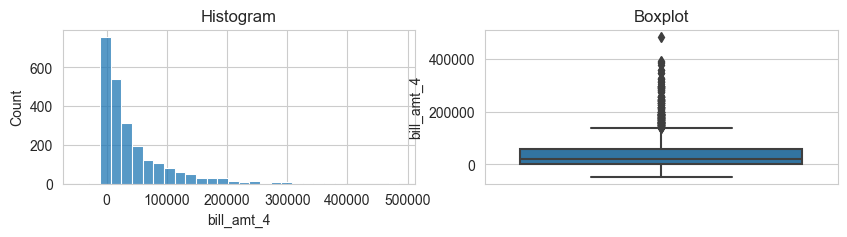

Skewness Value :  2.407928043343838


Diagnose variable bill_amt_5


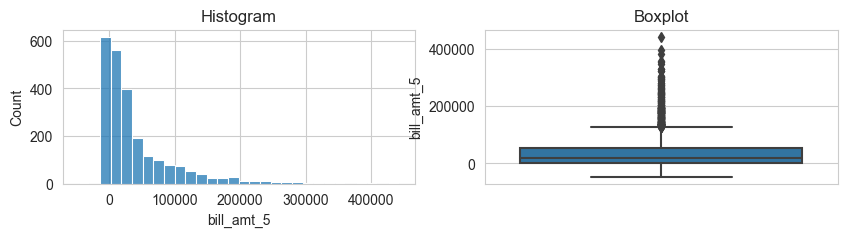

Skewness Value :  2.371061699309888


Diagnose variable bill_amt_6


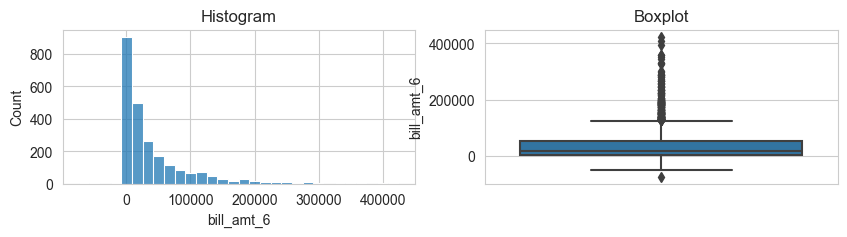

Skewness Value :  2.4204812606288084


Diagnose variable pay_amt_1


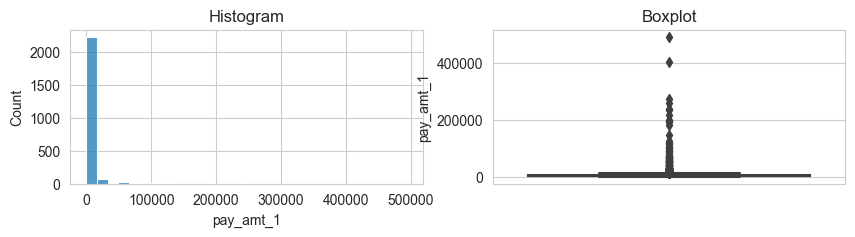

Skewness Value :  11.957911964446218


Diagnose variable pay_amt_2


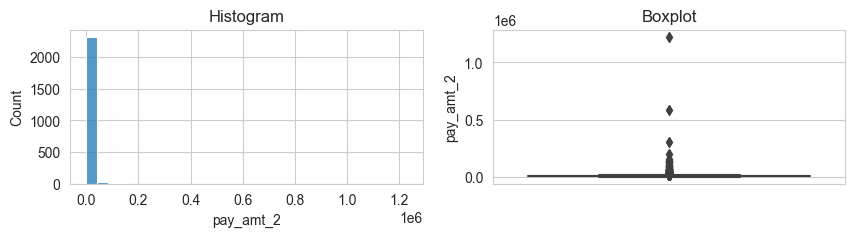

Skewness Value :  28.85544228759433


Diagnose variable pay_amt_3


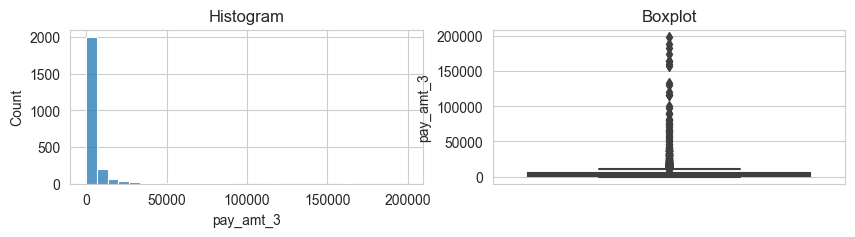

Skewness Value :  8.04031518529428


Diagnose variable pay_amt_4


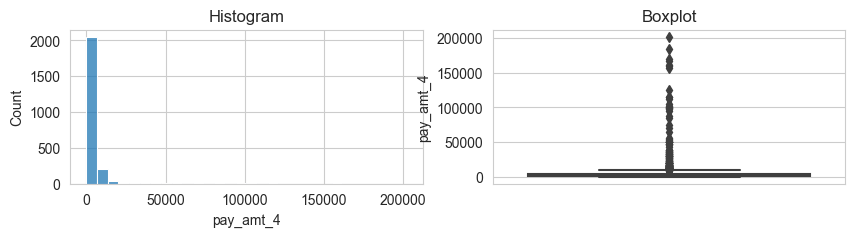

Skewness Value :  8.453467881114513


Diagnose variable pay_amt_5


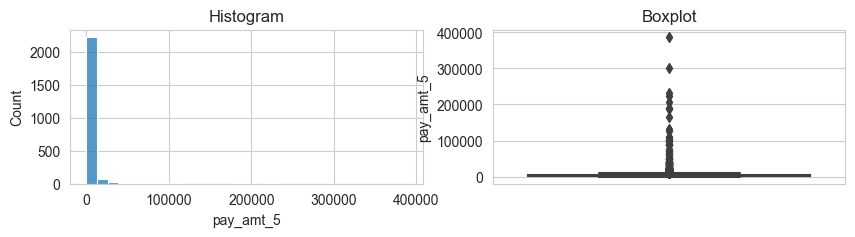

Skewness Value :  11.97950103321129


Diagnose variable pay_amt_6


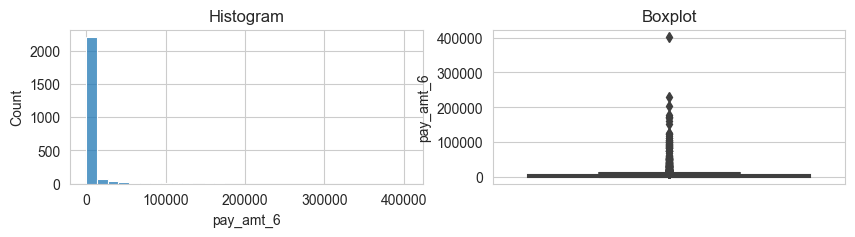

Skewness Value :  9.531121749092422




In [12]:
# See numerical data skewness and distribution
def diagnose(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

column = x_train.columns

# Lop For Visualization
for i in column:
    print(f'Diagnose variable {i}')
    diagnose(x_train, i)
    print('Skewness Value : ', x_train[i].skew())
    print('\n')

Diagnose results show that columns `gender` and `marital_status` have no outliers. We will handle outliers in continous numerical data.

In [13]:
# Define Columns With Outliers Presence
save = ['gender', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
col_out = [i for i in column if i not in save]
col_out

['limit_balance',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

#### Trimming

In [14]:
# Function to calculate upper and lower boundaries
def boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    # For Skewness Value in -1 <= value <= 1
    if df[variable].skew() <= 1 and df[variable].skew() >= -1:
        # For Normally Distributed Data
        if df[variable].skew() <= .5 and df[variable].skew() >= -.5:
            lower = df[variable].mean() - (3 * df[variable].std())
            upper = df[variable].mean() + (3 * df[variable].std())
        # For Moderately Skewed Data
        else:
            lower = df[variable].quantile(0.25) - (IQR * 1.5)
            upper = df[variable].quantile(0.75) + (IQR * 1.5)
    # For Extremly Skewed Data
    elif df[variable].skew() < 1 or df[variable].skew() > -1:
        lower = df[variable].quantile(0.25) - (IQR * 3)
        upper = df[variable].quantile(0.75) + (IQR * 3)
    
    
    return upper, lower

# List For Each Variables Boundaries
list_upper = []
list_lower = []

# Loop to Calulate
for i in col_out:
    upper, lower = boundaries(x_train, i)

    # Append list
    list_upper.append(upper)
    list_lower.append(lower)

In [15]:
# Show lower boundaries
list_lower

[-235000.0,
 -188553.5,
 -182528.5,
 -169735.0,
 -160853.25,
 -147716.25,
 -147353.5,
 -11812.5,
 -11000.0,
 -11719.0,
 -10969.0,
 -10809.25,
 -11672.75]

All lower boundaries are not realistic (negative values) thus can be ignored.

In [16]:
# Flagging Outliers
o1 = np.where(x_train['limit_balance'] > list_upper[0], True, False)
o2 = np.where(x_train['bill_amt_1'] > list_upper[1], True, False)
o3 = np.where(x_train['bill_amt_2'] > list_upper[2], True, False)
o4 = np.where(x_train['bill_amt_3'] > list_upper[3], True, False)
o5 = np.where(x_train['bill_amt_4'] > list_upper[4], True, False)
o6 = np.where(x_train['bill_amt_5'] > list_upper[5], True, False)
o7 = np.where(x_train['bill_amt_6'] > list_upper[6], True, False)
o8 = np.where(x_train['pay_amt_1'] > list_upper[7], True, False)
o9 = np.where(x_train['pay_amt_2'] > list_upper[8], True, False)
o10 = np.where(x_train['pay_amt_3'] > list_upper[9], True, False)
o11 = np.where(x_train['pay_amt_4'] > list_upper[10], True, False)
o12 = np.where(x_train['pay_amt_5'] > list_upper[11], True, False)
o13 = np.where(x_train['pay_amt_6'] > list_upper[12], True, False)

In [17]:
# Trim Outliers in x_train
x_train_trimmed = x_train.loc[~(o1+o2+o3+o4+o5+o6+o7+o8+o9+o10+o11+o12+o13)]

# Trim y_train Based on x_train_trimmed Index
y_train = y_train[x_train_trimmed.index]

### 4.3 - Missing Values

In [18]:
# Check Missing Values in y_train
y_train.isnull().sum()

0

In [19]:
# Check Missing Values in y_test
y_test.isnull().sum()

0

No missing values in y set.

### 4.4 - Scaling and Encoding

In [20]:
# Show Columns
x_train.columns

Index(['limit_balance', 'gender', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [21]:
# Define Numerical Features
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

cat_col = ['gender', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',]

In [22]:
# Set MinMaxScaler as Scaler
scaler = MinMaxScaler()

# Scalling Train and Test Sets
x_train_trimmed[num_col] = scaler.fit_transform(x_train_trimmed[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])
feature_names = scaler.get_feature_names_out(input_features=num_col)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4072\1397917913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_trimmed[num_col] = scaler.fit_transform(x_train_trimmed[num_col])


Since the categorical columns is already in float or int form, it is safe to say that those columns are already encoded. So based on personal knowledge encoding is not required here.

### 4.5 - Feature Selection

Phik can be used here to check on feature importance of both nominal and numerical features.

In [23]:
# Join to Check Correlation
corr_check = x_train_trimmed.copy()
corr_check['def_payment'] = y_train.copy()
corr_check

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment
2551,0.285714,2,2,2,0.145833,-1.0,-1.0,-1.0,-1.0,-1,0,0.009946,0.008543,0.104700,0.176458,0.193479,0.193237,0.018629,0.019421,0.019758,0.043403,0.000000,0.020375,0
2027,0.102041,1,3,1,0.708333,3.0,2.0,2.0,0.0,0,0,0.262567,0.253243,0.335958,0.283668,0.311573,0.301150,0.143086,0.000417,0.072727,0.079883,0.073333,0.093750,0
2460,0.224490,2,3,1,0.437500,-1.0,-1.0,-1.0,0.0,-1,0,0.017840,0.008291,0.121785,0.179784,0.207241,0.200299,0.015029,0.269927,0.000000,0.267275,0.000000,0.062938,0
283,0.040816,1,2,2,0.208333,0.0,0.0,0.0,0.0,0,0,0.120999,0.120740,0.453822,0.281781,0.307731,0.288198,0.114343,0.095318,0.036364,0.066569,0.031200,0.000000,0
2901,0.591837,2,1,2,0.437500,-1.0,-1.0,-1.0,0.0,0,-2,0.035223,0.009912,0.142937,0.176612,0.190716,0.190195,0.038171,0.583820,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.693878,1,2,1,0.375000,0.0,0.0,0.0,0.0,0,0,0.760582,0.702304,0.798666,0.826462,0.885740,0.862965,0.382571,0.414512,0.404182,0.372520,0.378400,0.342938,0
1217,0.326531,2,2,1,0.354167,0.0,0.0,0.0,0.0,0,2,0.582553,0.543044,0.664769,0.702374,0.651310,0.645912,0.285714,0.405099,0.393939,0.552523,0.000000,0.262500,0
2416,0.142857,1,1,2,0.145833,1.0,-1.0,-1.0,-1.0,-2,-2,0.008578,0.007426,0.104216,0.175233,0.190810,0.191895,0.002686,0.012332,0.000000,0.000000,0.000000,0.000000,0
2770,0.265306,2,2,1,0.291667,-1.0,-1.0,-1.0,-1.0,-1,-1,0.028277,0.024612,0.120976,0.190484,0.202797,0.209777,0.248000,0.258072,0.252848,0.369059,0.289667,0.136125,1


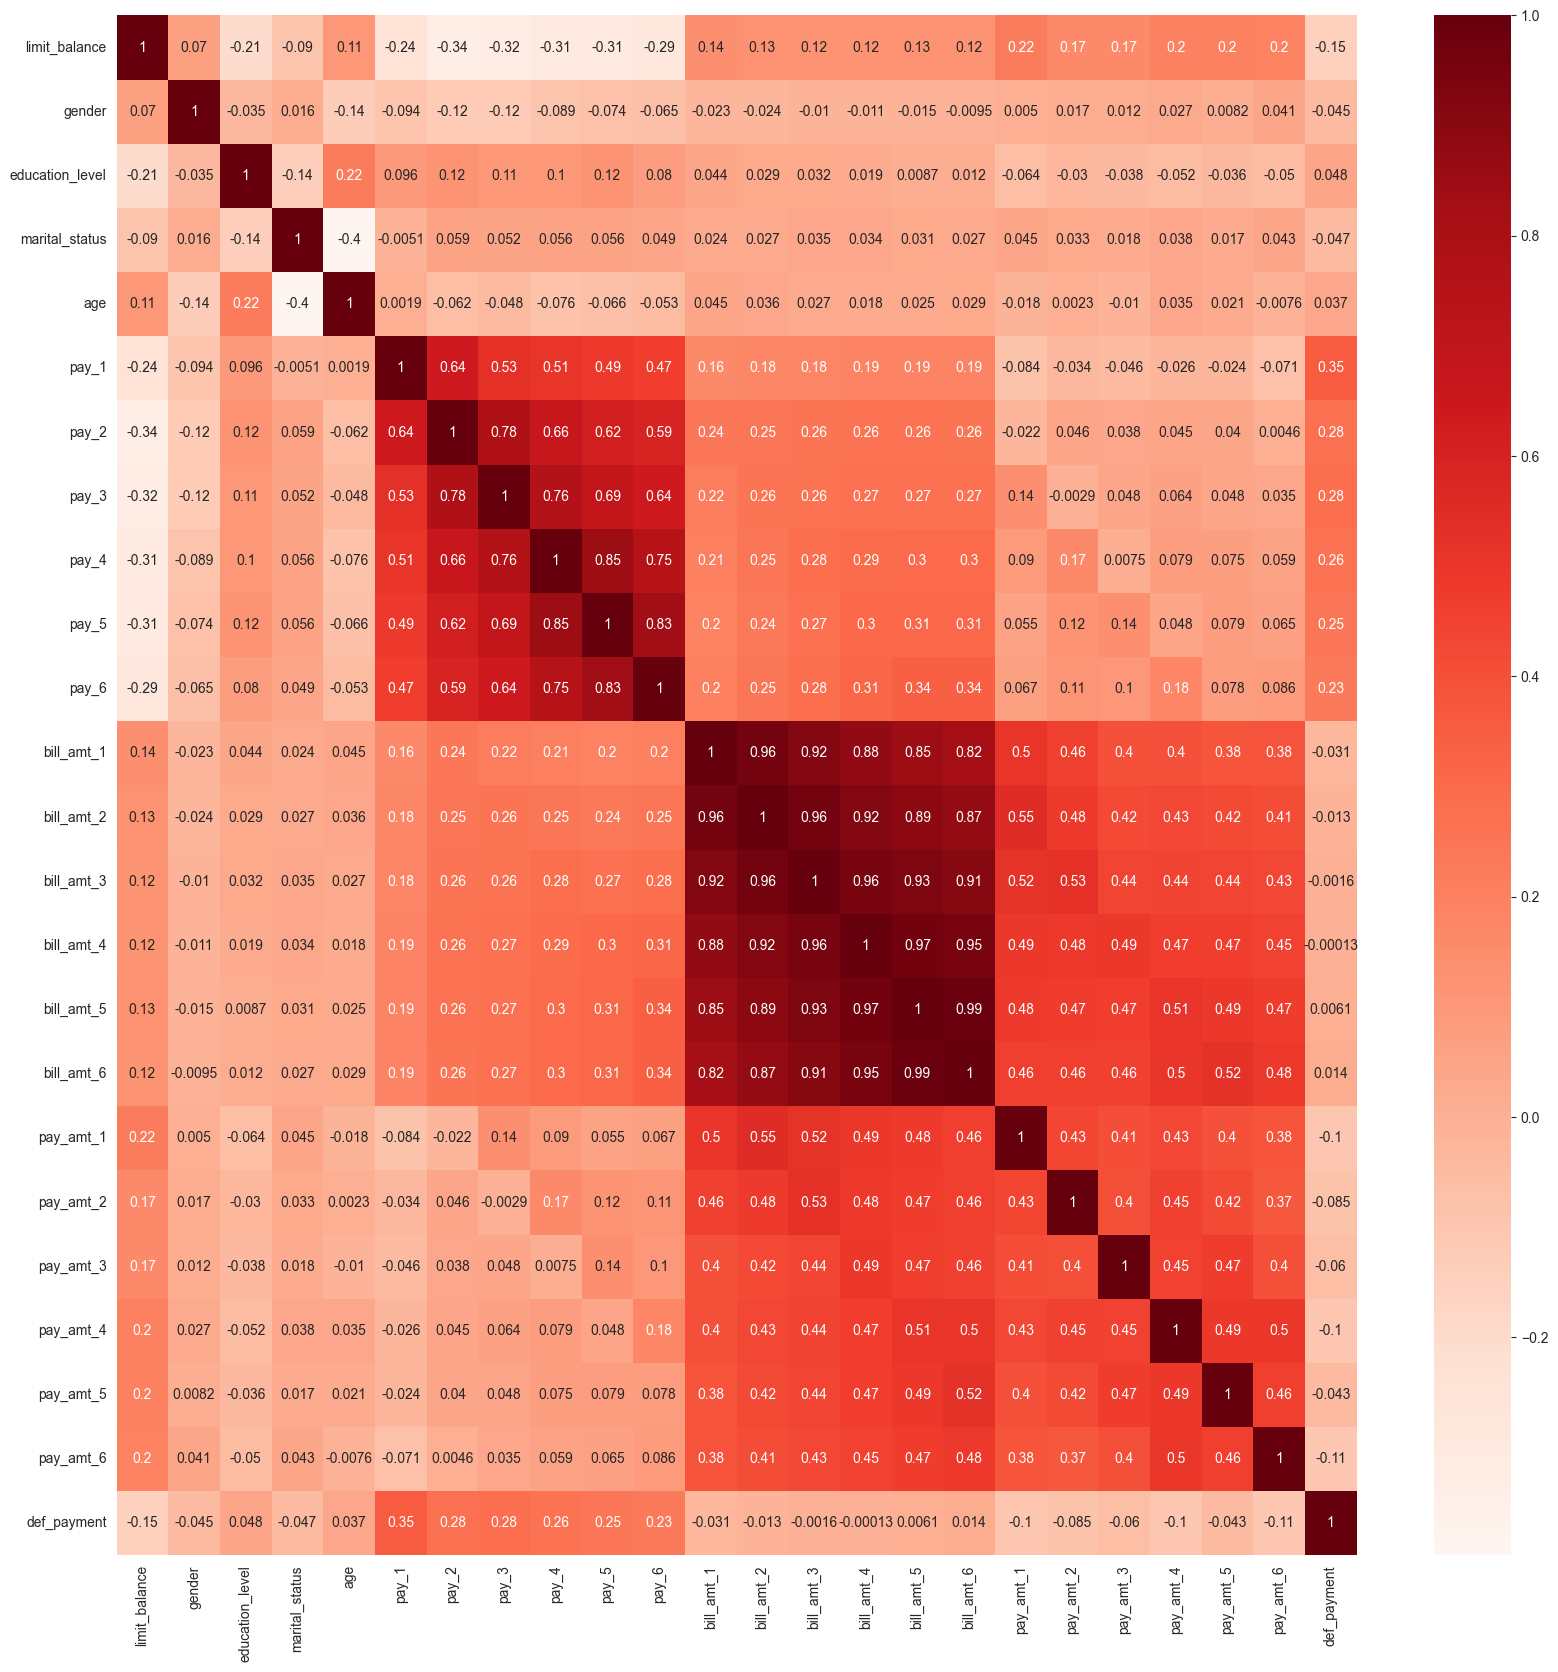

In [24]:
# Checking correlation between target and features with Pearson Correlation
plt.figure(figsize=(20,20))
corelation = corr_check.corr()
sns.heatmap(corelation, annot=True, cmap=plt.cm.Reds)
plt.show()

Looking results above, no columns with correlation above .5 or below -.5, hence we will pick columns that have correlation value above .3 and below -.3 towards `def_payment`.

Correlation values above .3 or below -.3 indicate strong correlation towards target column, otherwise values between -.3 and .3 indicate weak correlation.

In [25]:
# Set correlation target
corelation_target = abs(corelation['def_payment'])

# Select features with high correlation value towards target
sel_feature = corelation_target[(corelation_target > .3) | (corelation_target < -.3)]
print('Features with strong correlation with target are:')
sel_feature

Features with strong correlation with target are:


pay_1          0.354451
def_payment    1.000000
Name: def_payment, dtype: float64

From above we will choose features that have correlation values between -.3 and .3, since there is only one feature, there is no need to check for inbetween features correlation.

In [26]:
# Select Features
selected = ['pay_1']

This concludes our feature selection, it seemed that our overall hypothesis on EDA is explained with analysis above, where we assume that clients with tendency to default their payment for next month are clients with long payment delay and lower limit balance, then age and marital status are also somewhat influence the tendency for defaulting payment.

In [27]:
# Define Final Train and Test Set
x_train_final = x_train_trimmed[selected].copy()
x_train_final

,pay_1
2551,-1.0
2027,3.0
2460,-1.0
283,0.0
2901,-1.0
...,...
60,0.0
1217,0.0
2416,1.0
2770,-1.0


In [28]:
# Define Final Train and Test Set
x_test_final = x_test[selected].copy()
x_test_final

,pay_1
1570,2.0
644,0.0
2230,1.0
237,0.0
1557,2.0
...,...
2864,-1.0
2523,-1.0
1669,2.0
2072,1.0


## 5 - Model Definition

In [29]:
# Model Definition
lr = LogisticRegression(C=10, random_state=69, max_iter=500)
svc = SVC(C=10, kernel='rbf', random_state=69, probability=True)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=69)
rf = RandomForestClassifier(criterion='gini', max_depth=5, random_state=69)
knn = KNeighborsClassifier(weights='distance')
nb = GaussianNB()
vote = VotingClassifier(
    estimators=[('knn', knn), ('svc', svc), ('rf', rf)], voting='soft'
)

For logsitic regression C value is set to 10 to reduce the regularization due to avoid overfitting. Rbf chosen as kernel since it is to-go kernel or widely used in datascience.

Criterion gini is used due to its computational efficiency compared to entropy, max_depth set to 3 to avoid underfit results.

On knn, k neighbors set to default to set it on 5, due to personal judgement that k value shall be odd to avoid tie and set to 5 to avoid underfitting.

Finally, random_state is set to specific value to ensure the same 'random' is generated towards each model and with different predict/run trials.

## 6 - Model Training

In [30]:
# Logistic Regression
lr.fit(x_train_final, y_train)

LogisticRegression(C=10, max_iter=500, random_state=69)

In [31]:
# SVC
svc.fit(x_train_final, y_train)

SVC(C=10, probability=True, random_state=69)

In [32]:
# Decission Tree
dt.fit(x_train_final, y_train)

DecisionTreeClassifier(max_depth=5, random_state=69)

In [33]:
# Random Forest
rf.fit(x_train_final, y_train)

RandomForestClassifier(max_depth=5, random_state=69)

In [34]:
# KNN
knn.fit(x_train_final, y_train)

KNeighborsClassifier(weights='distance')

In [35]:
# GaussianNB
nb.fit(x_train_final, y_train)

GaussianNB()

In [36]:
# VotingClassifier
vote.fit(x_train_final, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(weights='distance')),
                             ('svc',
                              SVC(C=10, probability=True, random_state=69)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=69))],
                 voting='soft')

## 7 - Model Evaluation

For evaluation we will use f1 score since its value represent model' precision and recall. Below we will only display each model mean and standard deviation for f1 score.

Mean score explaining the mean value of f1 score for each model which indicates how our model perform(high f1 score means high precision or could be said that the model correctly predict majority of actual data), while standard deviation represents how consistent the model perform.

### 7.1 - Logistic Regression

In [37]:
# Logistic Regression Cross Validation Train Set
cv_score_lr1 = cross_val_score(lr,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')

# Logistic Regression Cross Validation Test Set
cv_score_lr2 = cross_val_score(lr,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')

print('F1 Score - Mean - LogisticRegression - Train : ', cv_score_lr1.mean())
print('F1 Score - Std - LogisticRegression - Train  : ', cv_score_lr1.std())
print('\nF1 Score - Mean - LogisticRegression - Test : ', cv_score_lr2.mean())
print('F1 Score - Std - LogisticRegression - Test  : ', cv_score_lr2.std())

F1 Score - Mean - LogisticRegression - Train :  0.48494253935356946
F1 Score - Std - LogisticRegression - Train  :  0.04364623726116557

F1 Score - Mean - LogisticRegression - Test :  0.41310924369747903
F1 Score - Std - LogisticRegression - Test  :  0.1865818702651049


With mean f1 .48 for train set and .41 for test set, this model has low performance which could be caused by model failure to predict both label correctly. On test set this model has standard deviation value of f1 at .19 which shows that the precision for label 1 and 0 have a gap of .19 or 19%. This indicates that this model has low consistency in test set. 

### 7.2 - SVC

In [38]:
# SVC Cross Validation Train Set
cv_score_svc1 = cross_val_score(svc,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')
# SVC Cross Validation Test Set
cv_score_svc2 = cross_val_score(svc,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')                             
print('F1 Score - Mean - SVC - Train : ', cv_score_svc1.mean())
print('F1 Score - Std - SVC - Train  : ', cv_score_svc1.std())
print('\nF1 Score - Mean - SVC - Test : ', cv_score_svc2.mean())
print('F1 Score - Std - SVC - Test  : ', cv_score_svc2.std())

F1 Score - Mean - SVC - Train :  0.4828112520560418
F1 Score - Std - SVC - Train  :  0.040810224157908796

F1 Score - Mean - SVC - Test :  0.4745305559294656
F1 Score - Std - SVC - Test  :  0.13169773687443997


This model has mean of f1 score at .48 at train set, which arguably better than other models, with .04 gap in precision for both target labels. If we compare the result to test set result, with mean and standard deviation of f1 at .47 and .13, this model preformance on test set seem to be declining and lower in consistency.

### 7.3 - DecissionTree

In [39]:
# DecissionTree Validation Train Set
cv_score_dt1 = cross_val_score(dt,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')
# DecissionTree Validation Test Set
cv_score_dt2 = cross_val_score(dt,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')                             
print('F1 Score - Mean - DecissionTree - Train : ', cv_score_dt1.mean())
print('F1 Score - Std - DecissionTree - Train  : ', cv_score_dt1.std())
print('\nF1 Score - Mean - DecissionTree - Test : ', cv_score_dt2.mean())
print('F1 Score - Std - DecissionTree - Test  : ', cv_score_dt2.std())

F1 Score - Mean - DecissionTree - Train :  0.4778957374631078
F1 Score - Std - DecissionTree - Train  :  0.0427459070723691

F1 Score - Mean - DecissionTree - Test :  0.4745305559294656
F1 Score - Std - DecissionTree - Test  :  0.13169773687443997


With f1 score of .48 and .47 for train set and test set respectively, with standard deviation of f1 score in test set at .13 which indicates relatively low consistency in test set.

### 7.4 - RandomForest

In [40]:
# RandomForest Validation Train Set
cv_score_rf1 = cross_val_score(rf,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')
# RandomForest Validation Test Set
cv_score_rf2 = cross_val_score(rf,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')                             
print('F1 Score - Mean - RandomForest - Train : ', cv_score_rf1.mean())
print('F1 Score - Std - RandomForest - Train  : ', cv_score_rf1.std())
print('\nF1 Score - Mean - RandomForest - Test : ', cv_score_rf2.mean())
print('F1 Score - Std - RandomForest - Test  : ', cv_score_rf2.std()) 

F1 Score - Mean - RandomForest - Train :  0.48035349475957484
F1 Score - Std - RandomForest - Train  :  0.04186148653067071

F1 Score - Mean - RandomForest - Test :  0.46946753071938163
F1 Score - Std - RandomForest - Test  :  0.13103850059489203


With mean f1 score of .48 and .46 for train set and test set respectively, surprisingly this model has lower performance result and consistency compared to Naive Bayes.

### 7.5 - KNN

In [41]:
# KNN Validation Train Set
cv_score_knn1 = cross_val_score(knn,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')
# KNN Validation Test Set
cv_score_knn2 = cross_val_score(knn,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')                             
print('F1 Score - Mean - KNN - Train : ', cv_score_knn1.mean())
print('F1 Score - Std - KNN - Train  : ', cv_score_knn1.std()) 
print('\nF1 Score - Mean - KNN - Test : ', cv_score_knn2.mean())
print('F1 Score - Std - KNN - Test  : ', cv_score_knn2.std()) 

F1 Score - Mean - KNN - Train :  0.47280875094617425
F1 Score - Std - KNN - Train  :  0.05312761254270934

F1 Score - Mean - KNN - Test :  0.4790418341249543
F1 Score - Std - KNN - Test  :  0.1341443020270921


This model has closer mean of f1 scores compared to other models, with .47 and .48 for train set and test set respectively. In addition this model has slightly better performance than Random Forest.

### 7.6 - Naive Bayes

In [42]:
# GaussianNB Validation Train Set
cv_score_nb1 = cross_val_score(nb,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')
# GaussianNB Validation Test Set
cv_score_nb2 = cross_val_score(nb,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')                             
print('F1 Score - Mean - NaiveBayes - Train : ', cv_score_nb1.mean())
print('F1 Score - Std - NaiveBayes - Train  : ', cv_score_nb1.std()) 
print('\nF1 Score - Mean - NaiveBayes - Test : ', cv_score_nb2.mean())
print('F1 Score - Std - NaiveBayes - Test  : ', cv_score_nb2.std()) 

F1 Score - Mean - NaiveBayes - Train :  0.48494253935356946
F1 Score - Std - NaiveBayes - Train  :  0.04364623726116557

F1 Score - Mean - NaiveBayes - Test :  0.47977591036414574
F1 Score - Std - NaiveBayes - Test  :  0.14046907780229512


Although this model has the highest mean of f1 score in train set (.49) compared to other models, this model closely resemble KNN performance results both in precision and consistency.

### 7.7 - Voting Classifier

In [43]:
# VotingClassifier Validation Train Set
cv_score_vote1 = cross_val_score(vote,
                             x_train_final,
                             y_train,
                             cv=10,
                             scoring='f1')
# VotingClassifier Validation Test Set                   
cv_score_vote2 = cross_val_score(vote,
                             x_test_final,
                             y_test,
                             cv=10,
                             scoring='f1')                             
print('F1 Score - Mean - VotingClassifier - Train : ', cv_score_vote1.mean())
print('F1 Score - Std - VotingClassifier - Train  : ', cv_score_vote1.std()) 
print('\nF1 Score - Mean - VotingClassifier - Test : ', cv_score_vote2.mean())
print('F1 Score - Std - VotingClassifier - Test  : ', cv_score_vote2.std())

F1 Score - Mean - VotingClassifier - Train :  0.4778957374631078
F1 Score - Std - VotingClassifier - Train  :  0.0427459070723691

F1 Score - Mean - VotingClassifier - Test :  0.47167341307232274
F1 Score - Std - VotingClassifier - Test  :  0.129231555874611


Prediction using VotingClassifier seem to be giving relatively lower results, with mean of f1 score in train and test set at .48 and .47, but has a slightly better consistency compared to other models.

If we are to compare all models results, there 2 models that stand out compared to others. SVC has the better perfomance results for both set, but VotingClassifier shows potential with higher performance consistency. As the verdict, we can not precisely tell which model excelled from Cross Validation above, but we will proceed with model that is slightly precise and consistent, which is SVC model.

## 8 - Hyperparameter Tuning

In [44]:
# Define Hyperparameters
C       = [int(x) for x in np.linspace(start=1, stop=50, num=50)]
gamma   = [1, 0.1, 0.01, 0.001]
kernel  = ['linear', 'rbf', 'poly', 'sigmoid']
random_grid = {'C': C,
               'gamma': gamma,
               'kernel':kernel}
random_grid

{'C': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 'gamma': [1, 0.1, 0.01, 0.001],
 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [45]:
# Train with Random Search
svc_randomcv = RandomizedSearchCV(estimator=SVC(), 
                                 param_distributions=random_grid,
                                 cv=5, 
                                 random_state=69, 
                                 n_jobs=-1, 
                                 scoring='f1')
svc_randomcv.fit(x_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=69, scoring='f1')

In [46]:
# Get Best Hyperparameters
svc_randomcv.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 50}

In [47]:
# Get Best Estimator
svc_randomcv_best = svc_randomcv.best_estimator_

# Check Performance Model against Test-Set
y_pred_test = svc_randomcv_best.predict(x_test_final)
y_pred_train = svc_randomcv_best.predict(x_train_final)
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      1378
           1       0.77      0.36      0.49       449

    accuracy                           0.81      1827
   macro avg       0.79      0.66      0.69      1827
weighted avg       0.81      0.81      0.79      1827
 



After hyperparameter tuning done, we could see that the prediction results do improve, with information below :
1. train set results
    * .82 and .77 precision for label 0 and label 1 respectively, indicates that after tuning the model correctly 82% data as label 0 and 77% data as label 1.
    * .96 and .36 recall for train and test set respectively, indicates that after tuning the model predict 96% actual data with label 0 and 36% actual data with label 1 are correctly predicted.
    * Mean of f1 score is greatly improved from .48 to .69 which shows model improvement do achieved with this tuning.

In [48]:
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       465
           1       0.71      0.38      0.49       127

    accuracy                           0.83       592
   macro avg       0.78      0.67      0.70       592
weighted avg       0.82      0.83      0.81       592
 



2. Test set results
    * .85 and .71 precision for label 0 and label 1 respectively, indicates that after tuning the model correctly 85% data as label 0 and 71% data as label 1.
    * .96 and .38 recall for train and test set respectively, indicates that after tuning the model predict 96% actual data with label 0 and 38% actual data with label 1 are correctly predicted.
    * Mean of f1 score is greatly improved from .47 to .70 which shows model improvement do achieved with this tuning.

## 9 - Model Inference

In [49]:
# Saving Tuned Model
with open('svc_tuned.pkl', 'wb') as file_1:
    pickle.dump(svc_randomcv_best, file_1)

# Saving Numerical Columns
with open('selected_col.txt', 'w') as file_4:
    json.dump(selected, file_4)

# Convert Dataframe of Sample to JSON
sample = data_inference.to_json()
with open('data_sample.txt', 'w') as file_6:
    json.dump(sample, file_6)

## 10 - Conclusion

1.  The hypothesis where we assume correlation of clients limit balance and  tendency to delay monthly payment towards defaulting payment for next month are clarified in our analysis of feature importance.
2.  With mean and standard deviation of f1 score at .48 and .04, SVC model presumed to be the better model and has relativelty better consistency overall.
3.  Hyperparameter tuning has improved model's performance, this proved with the increase of mean f1 score value from .48 to .69 .

# Conceptual Problems

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
```
Criterion pada Decision Tree adalah kriteria yang digunakan model untuk melakukan split decision pada setiap node. Pada model decision tree yang digunakan, criterion gini digunakan dikarenakan efisiensi dari komputasi nya yang lebih baik dibandingkan entropy di mana tidak digunakannya komputasi berbasis logaritmik, sehingga menghasilkan proses model yang lebih cepat
```
Reference: 
- https://scikit-learn.org/stable/modules/tree.html
- https://medium.com/geekculture/criterion-used-in-constructing-decision-tree-c89b7339600f

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
```
Pada Tree-based model, pruning adalah proses penghapusan cabang dengan signifikansi rendah terhadap keseluruhan proses penentuan keputusan untuk menghindari performa model under-fit. Secara teori, terdapat 2 jenis pruning yaitu pre-pruning, dimana pruning dilakukan pada saat pengembangan decision tree, dan post pruning, dimana pruning node dilakukan setelah decision tree selesai.

Dalam pemodelan pruning dapat dilakukan dengan membatasi iterasi estimasi, kedalaman decision tree dan jumlah daun untuk setiap node pada hyperparameter tuning.
```
Reference:
- https://scikit-learn.org/stable/modules/tree.html
- https://www.displayr.com/machine-learning-pruning-decision-trees/

3. Bagaimana cara memilih K yang optimal pada KNN ?
```
Pada KNN, nilai k yang kecil akan menyebabkan noise memiliki pengaruh kuat pada hasil, sedangkan nilai k yang tinggi akan menjadikan model menjadi high-cost dari sisi komputasinya. 

Pemilihan nilai k dapat ditentukan dengan akar pangkat dua dari jumlah kelas/variabel. Nilai k yang dipilih pada umum nya adalah bilangan ganjil dimana pemilihan ini dilakukan untuk menghindari kondisi tie/sama.
```
Reference:
- https://scikit-learn.org/stable/modules/neighbors.html
- https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606/2

4. Jelaskan apa yang dimaksud dengan Cross Validation !
```
Secara terminologi cross validation adalah suatu metode yang melakukan validasi silang pada dataset untuk menguji bilamana model yang digunakan dapat menarik benang merah dari keseluruhan dataset.

Cross validation pada ML adalah salah satu metode evaluasi model yang melakukan validasi performa terhadap satu atau lebih model yang digunakan untuk suatu dataset. Dalam analisa yang dilakukan cross validation digunakan sebagai metode evaluasi untuk melakukan validasi terhadap model logistic regression, SVC, decission tree, random forest, KNN, naive bayes, dan voting classifier, sebagai platform bantuan untuk membandingkan performa antara model.
```
Reference:
https://stephenallwright.com/cross_val_score-sklearn/#:~:text=Cross_val_score%20is%20a%20method%20which,metric%20value%20for%20the%20dataset.

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?
```
Sesuai dengan namanya, akurasi adalah nilai yang merepresentasikan tingkat keberhasilan performa model berdasarkan keseluruhan data set. Nilai ini hanya dapat digunakan bilamana jumlah label target dalam kondisi seimbang atau balance.

Precision adalah jumlah data yang terprediksi secara benar berdasarkan jumlah data aktual dengan label yang sama, sedangkan recall adalah jumlah data aktual yang terprediksi benar berdasarkan jumlah keseluruhan prediksi untuk label tersebut. Precision dan recall dapat digunakan untuk melihat detil jumlah prediksi tepat untuk setiap label kategorik berdasarkan jumlah data aktual.

F1 score adalah ukuran gabungan dari precision dan recall yang dapat dinterpretasikan sebagai tingkat keberhasilan performa suatu model. Penggunaan precision, recall dan F1 score tidak terbatas pada kondisi seimbang setiap label seperti penggunaan nilai akurasi. Pada analisa cross validation yang dilakukan, f1 score digunakan dikarenakan jumlah data target yang imbalance.
```
Reference:
https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd